# Proyecto 1 IA en Equipo
## Clasificación de Sentimiento
*   José Miguel González Zaragoza
*   David Sebastian Izaguirre Garza
*   Joel Diaz


In [23]:
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 1.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 3.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.0/508.0 kB 5.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 4.1 MB/s eta 0:00:00a 0:00:01


In [24]:
import pandas as pd
from keras.datasets import imdb

# Cargar el dataset IMDB
max_words = 10000  # Limitar el número de palabras a las 10,000 más comunes
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

# Descripción del dataset
print(f"Training data shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Labels shape: {y_test.shape}")

# Ejemplo de reseñas y sus etiquetas
print("Ejemplos de reseñas y etiquetas:")
for i in range(3):
    print(f"Review: {x_train[i]}\nLabel: {y_train[i]}")


Training data shape: (25000,), Labels shape: (25000,)
Test data shape: (25000,), Labels shape: (25000,)
Ejemplos de reseñas y etiquetas:
Review: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 

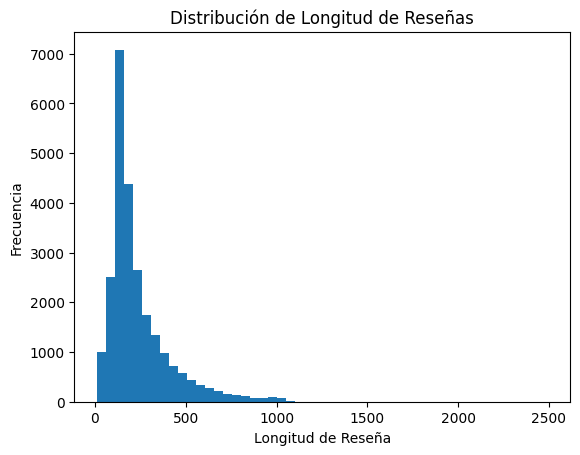

Reseña: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't

In [25]:
import matplotlib.pyplot as plt

# Visualizar la longitud de las reseñas
review_lengths = [len(review) for review in x_train]
plt.hist(review_lengths, bins=50)
plt.title('Distribución de Longitud de Reseñas')
plt.xlabel('Longitud de Reseña')
plt.ylabel('Frecuencia')
plt.show()

# Ejemplo de reseñas
from keras.preprocessing import sequence

# Convertir las reseñas a texto
word_index = imdb.get_word_index()
index_word = {index: word for word, index in word_index.items()}

# Función para convertir índices a texto
def indices_to_text(review_indices):
    return ' '.join([index_word.get(i - 3, '?') for i in review_indices])

# Mostrar ejemplos de reseñas
for i in range(3):
    print(f"Reseña: {indices_to_text(x_train[i])}\nEtiqueta: {y_train[i]}")


In [26]:
# Preprocesar los datos
from keras.preprocessing import sequence

# Rellenar las secuencias
max_len = 500  # Longitud máxima
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

# Verificar los datos
print("Datos después del padding:")
print(f"x_train shape: {x_train.shape}, x_test shape: {x_test.shape}")


Datos después del padding:
x_train shape: (25000, 500), x_test shape: (25000, 500)
